### FAHAD HUSSAIN SADAT
### BSDSF21M014

### Loading The Model 

In [1]:
import pandas as pd

# Loading the cloud computing dataset
file_path = 'ccdata.xlsx'

morning_data = pd.read_excel(file_path, sheet_name='cloud computing morning', skiprows=1)
afternoon_data = pd.read_excel(file_path, sheet_name='cloud computing afternoon', skiprows=1)


morning_data = morning_data[1:].reset_index(drop=True)
afternoon_data = afternoon_data[1:].reset_index(drop=True)

columns_to_drop = ['Sr. No.', 'Roll Number', 'Name']
morning_data_cleaned = morning_data.drop(columns=columns_to_drop)
afternoon_data_cleaned = afternoon_data.drop(columns=columns_to_drop)

morning_data_cleaned = morning_data_cleaned.apply(pd.to_numeric, errors='coerce')
afternoon_data_cleaned = afternoon_data_cleaned.apply(pd.to_numeric, errors='coerce')

print("Cleaned Morning Data:")
print(morning_data_cleaned.head())

print("\nCleaned Afternoon Data:")
print(afternoon_data_cleaned.head())


Cleaned Morning Data:
   A1    Q1  A2  Q2    A3    A4    Q3      Mid  AWS Labs    Q4    A5   Q5  \
0  10  14.0  10  18   NaN  10.0  15.0  20.1250       9.0  16.0   NaN  4.0   
1  10  14.5  10   0  95.0  10.0  28.0  28.4375       9.0  35.0  95.0  NaN   
2  10   0.0   0   0  55.0   0.0   NaN  22.7500       5.0   NaN   NaN  NaN   
3  10   0.0   0  10  90.0  10.0  28.0  28.0000       5.0  24.0  90.0  NaN   
4  10  15.0  10  25   NaN  10.0  20.0  28.4375      10.0  22.0   NaN  NaN   

      A6      Final  Unnamed: 17  
0    NaN  24.000000           54  
1   95.0  34.909091           84  
2    NaN  30.909091           59  
3  100.0  35.272727           81  
4    NaN  24.727273           63  

Cleaned Afternoon Data:
     A1    Q1    A2    Q2     A3    A4    Q3      Mid  AWS Labs    Q4    A5  \
0  10.0  13.5  10.0  22.0  100.0  10.0  31.0  24.0625       9.0  13.0  95.0   
1   0.0   0.0   0.0   0.0    NaN   NaN   NaN   0.0000       NaN   NaN   NaN   
2   0.0   0.0   0.0   0.0    NaN   NaN   Na

In [2]:
def apply_weightage(data, weights, max_marks):
    # Drop irrelevant columns
    irrelevant_columns = ['Sr. No.', 'Roll Number', 'Name']
    columns_to_drop = [col for col in irrelevant_columns if col in data.columns]
    data = data.drop(columns=columns_to_drop, errors='ignore')
    
    for col, weight in weights.items():
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce') 
            data[col] = (data[col] / max_marks[col]) * weight  
    
    data = data.fillna(0)
    
    return data

weights = {
    'A1': 1, 'Q1': 1.5, 'A2': 1, 'Q2': 1.5, 'A3': 1,
    'A4': 4, 'Q3': 1.5, 'Mid': 35, 'AWS Labs': 3,
    'Q4': 1.25, 'A5': 4, 'Q5': 1.25, 'A6': 4, 'Final': 40
}
max_marks = {
    'A1': 10, 'Q1': 21, 'A2': 10, 'Q2': 30, 'A3': 100,
    'A4': 10, 'Q3': 41, 'Mid': 35, 'AWS Labs': 10,
    'Q4': 40, 'A5': 100, 'Q5': 20, 'A6': 100, 'Final': 40
}
morning_data_weighted = apply_weightage(morning_data_cleaned, weights,max_marks)
afternoon_data_weighted = apply_weightage(afternoon_data_cleaned, weights,max_marks)


### After Normalizing

In [3]:
morning_data_weighted.head()

A1        Q1   A2    Q2    A3   A4        Q3      Mid  AWS Labs       Q4  \
0  1.0  1.000000  1.0  0.90  0.00  4.0  0.548780  20.1250       2.7  0.50000   
1  1.0  1.035714  1.0  0.00  0.95  4.0  1.024390  28.4375       2.7  1.09375   
2  1.0  0.000000  0.0  0.00  0.55  0.0  0.000000  22.7500       1.5  0.00000   
3  1.0  0.000000  0.0  0.50  0.90  4.0  1.024390  28.0000       1.5  0.75000   
4  1.0  1.071429  1.0  1.25  0.00  4.0  0.731707  28.4375       3.0  0.68750   

    A5    Q5   A6      Final  Unnamed: 17  
0  0.0  0.25  0.0  24.000000           54  
1  3.8  0.00  3.8  34.909091           84  
2  0.0  0.00  0.0  30.909091           59  
3  3.6  0.00  4.0  35.272727           81  
4  0.0  0.00  0.0  24.727273           63

In [4]:
# Separate features and target
X_train = morning_data_weighted.drop(columns=['Final'])
y_train = morning_data_weighted['Final']

X_test = afternoon_data_weighted.drop(columns=['Final'])
y_test = afternoon_data_weighted['Final']

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (50, 14)
Training Target Shape: (50,)
Testing Features Shape: (39, 14)
Testing Target Shape: (39,)


### Training For 5 to 13 Activites Making Seperated Models

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


results = []

import pickle

for n in range(5, X_train.shape[1] + 1):
    print(f"\nTraining model with the first {n} activities...")
    
    X_train_n = X_train.iloc[:, :n]
    X_test_n = X_test.iloc[:, :n]
    
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_n, y_train)
    
    with open(f"cloud_computing_model_{n}_activities.pkl", "wb") as file:
        pickle.dump(model, file)
    
    y_pred = model.predict(X_test_n)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Activities': n, 'RMSE': rmse, 'R2': r2})
    
    print(f"Activities: {n}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)



Training model with the first 5 activities...
Activities: 5, RMSE: 7.3820, R2: 0.1115

Training model with the first 6 activities...
Activities: 6, RMSE: 7.5192, R2: 0.0782

Training model with the first 7 activities...
Activities: 7, RMSE: 7.1298, R2: 0.1712

Training model with the first 8 activities...
Activities: 8, RMSE: 6.0843, R2: 0.3964

Training model with the first 9 activities...
Activities: 9, RMSE: 5.9262, R2: 0.4274

Training model with the first 10 activities...
Activities: 10, RMSE: 5.6378, R2: 0.4818

Training model with the first 11 activities...
Activities: 11, RMSE: 5.5901, R2: 0.4905

Training model with the first 12 activities...
Activities: 12, RMSE: 5.4546, R2: 0.5149

Training model with the first 13 activities...
Activities: 13, RMSE: 5.6451, R2: 0.4804

Training model with the first 14 activities...


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Total
Feature names seen at fit time, yet now missing:
- Unnamed: 17


### Testing on single input row

In [ ]:
def normalize_input(input_activities, weights, max_marks):
    
    normalized_activities = []
    for activity, score in input_activities.items():
        if activity in weights and activity in max_marks:
            normalized_score = (score / max_marks[activity]) * weights[activity]
            normalized_activities.append(normalized_score)
        else:
            raise ValueError(f"Invalid activity key: {activity}. Ensure it exists in weights and max_marks.")
    return normalized_activities


def predict_final_score(input_activities):
    
    import numpy as np
    import pickle
    
    # Normalize the input activities
    normalized_activities = normalize_input(input_activities, weights, max_marks)
    
    n = len(normalized_activities)  
    
    try:
        with open(f"cloud_computing_model_{n}_activities.pkl", "rb") as file:
            model = pickle.load(file)
    except FileNotFoundError:
        return f"No model available for {n} activities. Train the model first."

    input_array = np.array(normalized_activities).reshape(1, -1)

    predicted_score = model.predict(input_array)[0]
    return predicted_score


weights = {
    'A1': 1, 'Q1': 1.5, 'A2': 1, 'Q2': 1.5, 'A3': 1,
    'A4': 4, 'Q3': 1.5, 'Mid': 35, 'AWS Labs': 3,
    'Q4': 1.25, 'A5': 4, 'Q5': 1.25, 'A6': 4, 'Final': 40
}

max_marks = {
    'A1': 10, 'Q1': 21, 'A2': 10, 'Q2': 30, 'A3': 100,
    'A4': 10, 'Q3': 41, 'Mid': 35, 'AWS Labs': 10,
    'Q4': 40, 'A5': 100, 'Q5': 20, 'A6': 100, 'Final': 40
}

input_activities = {'A1': 2, 'Q1': 5, 'A2': 2, 'Q2': 10, 'A3': 2, 'A4': 1}  
predicted_score = predict_final_score(input_activities)

print(f"Predicted Final Score: {predicted_score}")


### Visualizing Results & Testing 

Activities: 5, RMSE: 25.4875
Activities: 6, RMSE: 25.4770
Activities: 7, RMSE: 25.2425
Activities: 8, RMSE: 23.0968
Activities: 9, RMSE: 23.0191
Activities: 10, RMSE: 23.2108
Activities: 11, RMSE: 23.0004
Activities: 12, RMSE: 22.6815
Activities: 13, RMSE: 22.5882


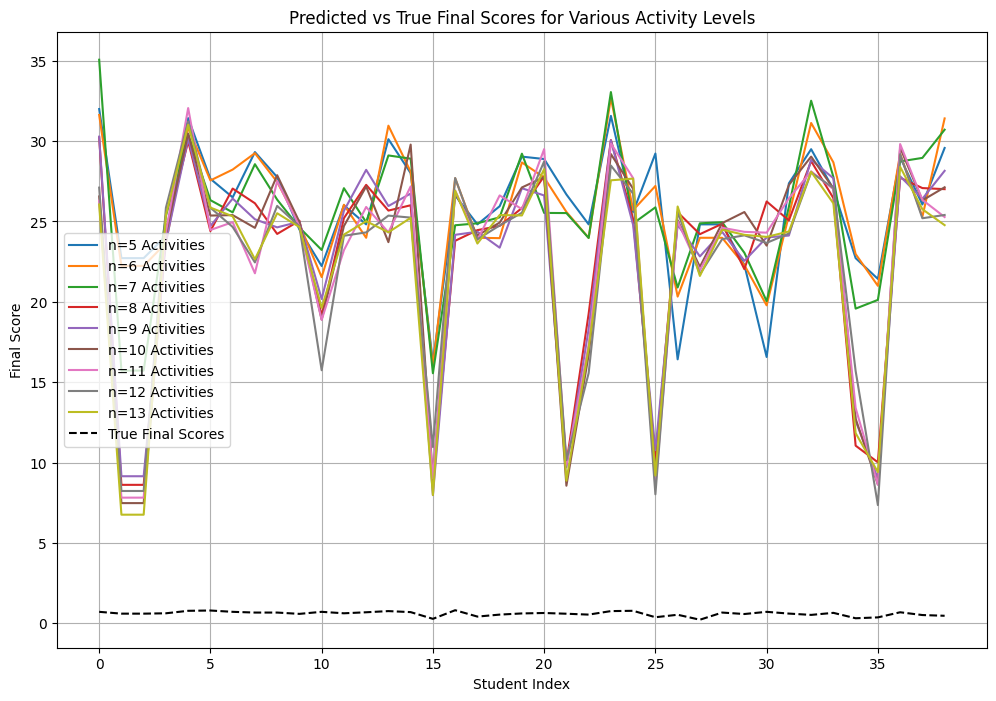

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

predictions = []

# Loop over activity numbers from 5 to 13
for n in range(5, 14):
    try:
        X_test_n = X_test.iloc[:, :n]

        with open(f"cloud_computing_model_{n}_activities.pkl", "rb") as file:
            model = pickle.load(file)

        y_pred = model.predict(X_test_n)*40

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store the predictions and RMSE
        predictions.append({'Activities': n, 'RMSE': rmse, 'Predictions': y_pred})

        print(f"Activities: {n}, RMSE: {rmse:.4f}")

    except FileNotFoundError:
        print(f"Model for {n} activities not found. Skipping.")

# Visualize predictions for each student and number of activities
plt.figure(figsize=(12, 8))
for result in predictions:
    n = result['Activities']
    plt.plot(range(len(y_test)), result['Predictions'], label=f'n={n} Activities')

plt.plot(range(len(y_test)), y_test, 'k--', label='True Final Scores')

plt.xlabel('Student Index')
plt.ylabel('Final Score')
plt.title('Predicted vs True Final Scores for Various Activity Levels')
plt.legend()
plt.grid(True)
plt.show()
